In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load dataset
df = pd.read_csv('/content/Telco data.csv')

In [41]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


Distribution of Churn

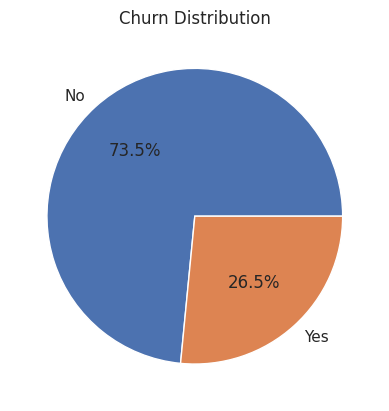

In [48]:
df['Churn Label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

Churn Rate by Gender

<Figure size 2000x1500 with 0 Axes>

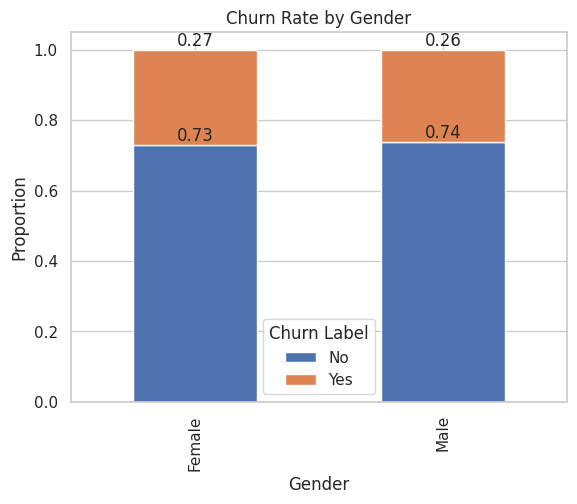

In [145]:
plt.figure(figsize=(20, 15))
# Create a stacked bar chart
ax = df.groupby('Gender')['Churn Label'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')

# Add values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., p.get_y() + height),
                ha='center', va='bottom')

plt.show()

Churn Rate by Senior Citizen

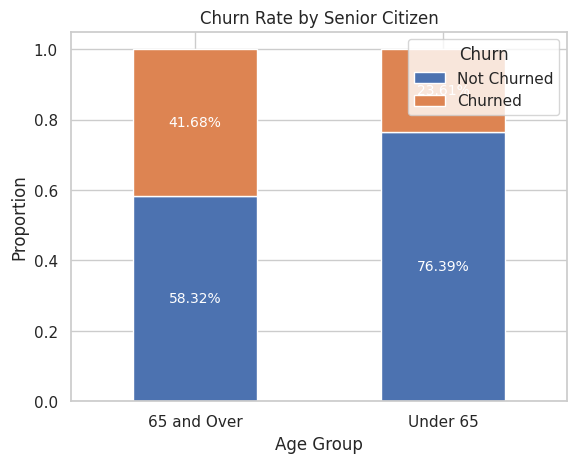

In [71]:
#Map 'Senior Citizen' to age groups
df['age_group'] = df['Senior Citizen'].map({'No': 'Under 65', 'Yes': '65 and Over'})

# Calculate churn rate by age group
churn_rate = df.groupby('age_group')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Senior Citizen')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adding values to the bars
for p in ax.patches:
    # Get the height of each bar segment
    height = p.get_height()
    # Get the x and y position of the segment
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    # Annotate the height of the bar segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='white')

plt.show()

Monthly Charges vs. Churn

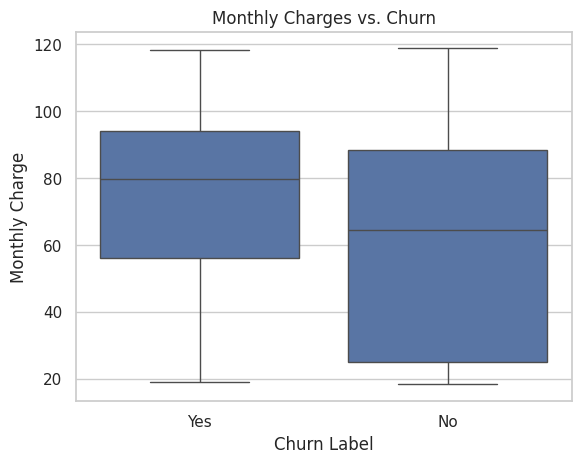

In [77]:
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)
plt.title('Monthly Charges vs. Churn')
plt.show()

Churn by Internet Service Type

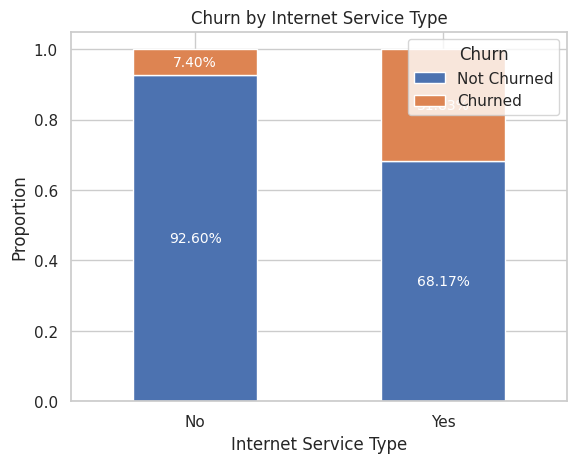

In [79]:
# Calculate churn rate by Internet Service
churn_rate = df.groupby('Internet Service')['Churn'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True)
plt.title('Churn by Internet Service Type')
plt.ylabel('Proportion')
plt.xlabel('Internet Service Type')  # Optional: Label for x-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])  # Optional: Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='white')

plt.show()

Churn Rate by Contract Type

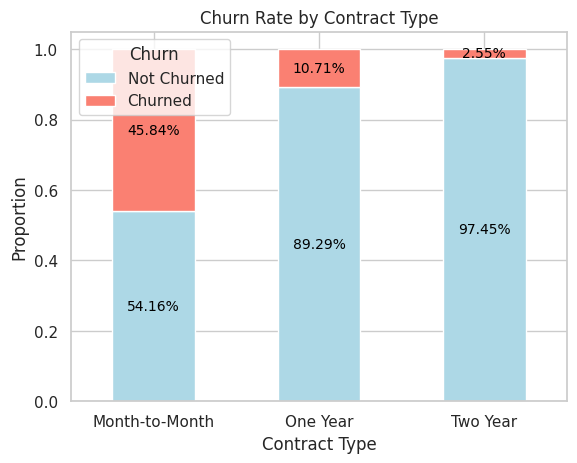

In [84]:
# Calculate churn rate by Contract Type
churn_rate = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.xlabel('Contract Type')  # Optional: Label for x-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])  # Optional: Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='black')

plt.show()

Average Total Charges by Churn

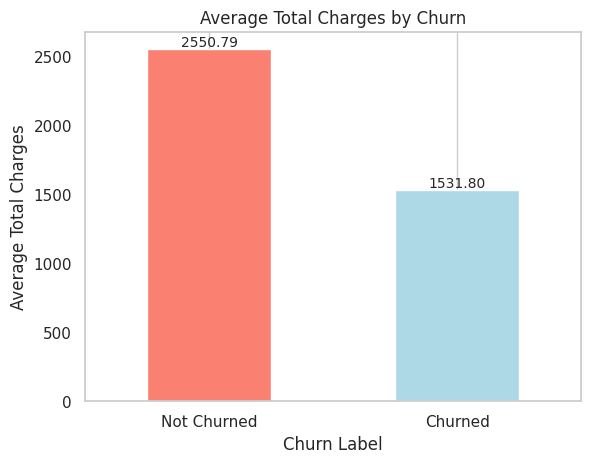

In [89]:
# Calculate average Total Charges by Churn Label
average_charges = df.groupby('Churn Label')['Total Charges'].mean()

# Plot the average Total Charges
ax = average_charges.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Average Total Charges by Churn')
plt.ylabel('Average Total Charges')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)  # Optional: Rename x-axis ticks
plt.grid(axis='y')  # Optional: Add grid lines for better readability

# Optional: Adding values to the bars
for index, value in enumerate(average_charges):
    ax.annotate(f'{value:.2f}', (index, value), ha='center', va='bottom', fontsize=10)

plt.show()

Correlation Matrix

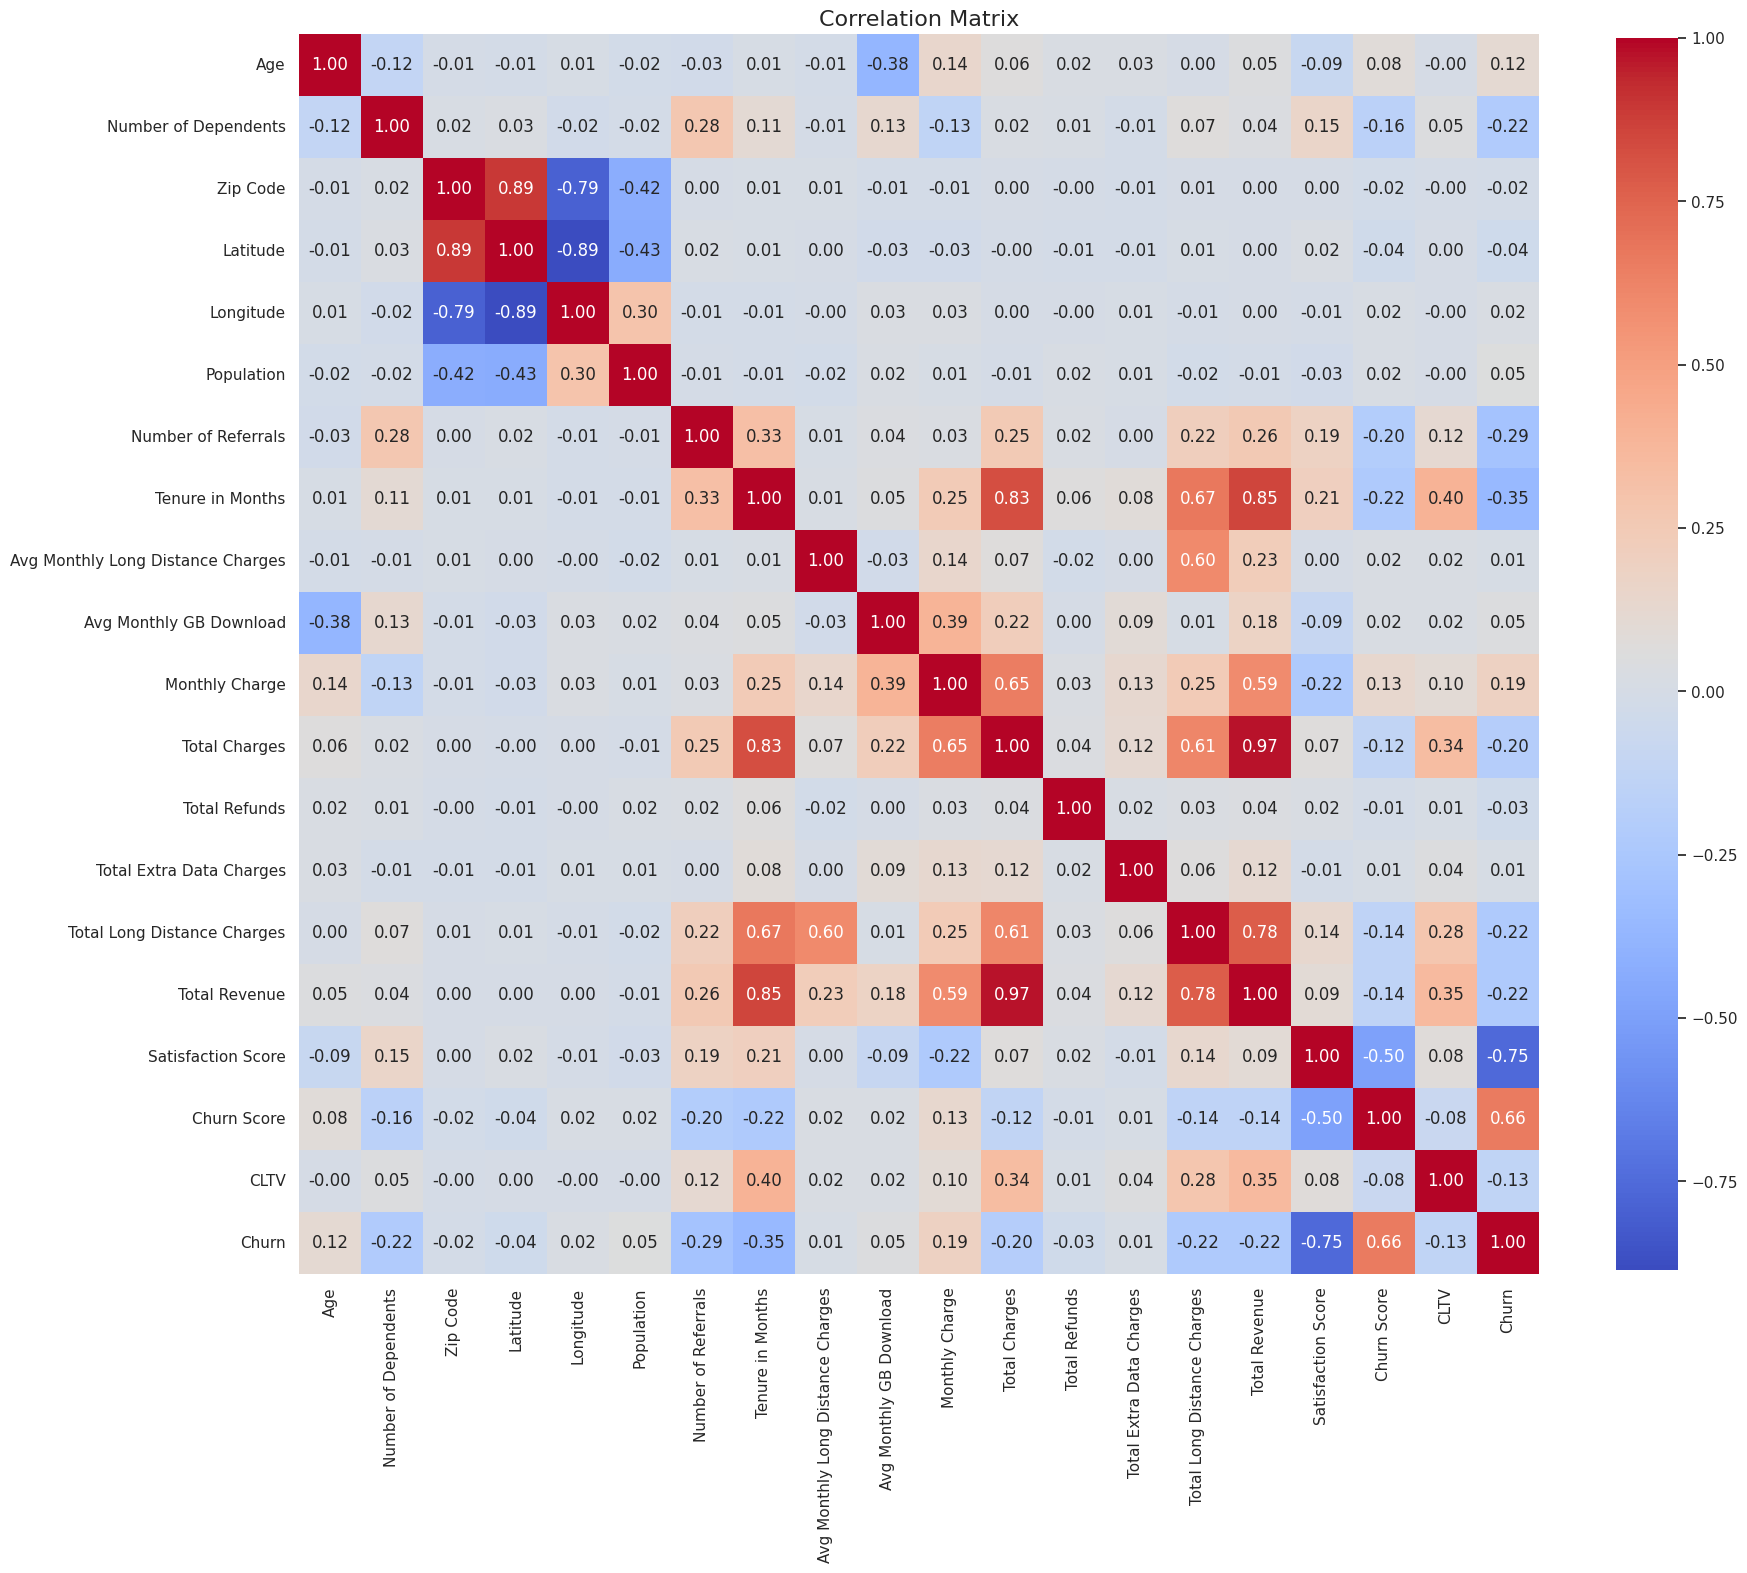

In [93]:
# Convert relevant columns to numeric (will coerce errors to NaN)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check which columns are numeric
numeric_df = df.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(20, 20))

# Create the heatmap for the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

Churn vs. Payment Method

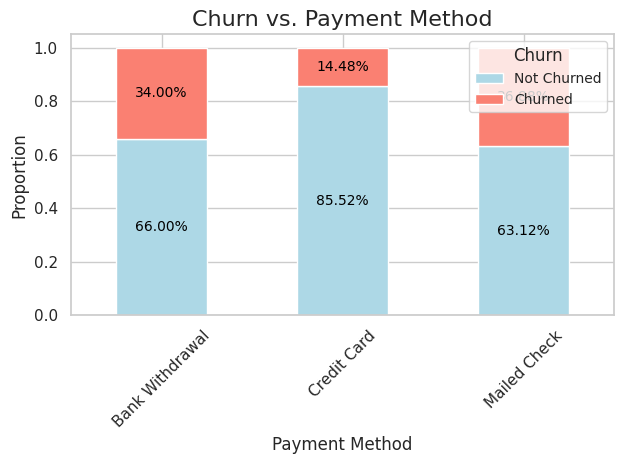

In [99]:
# Calculate churn rate by Payment Method
churn_rate = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn vs. Payment Method', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Payment Method', fontsize=12)  # Optional: Label for x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)  # Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Churn Rate by Device Protection Subscription

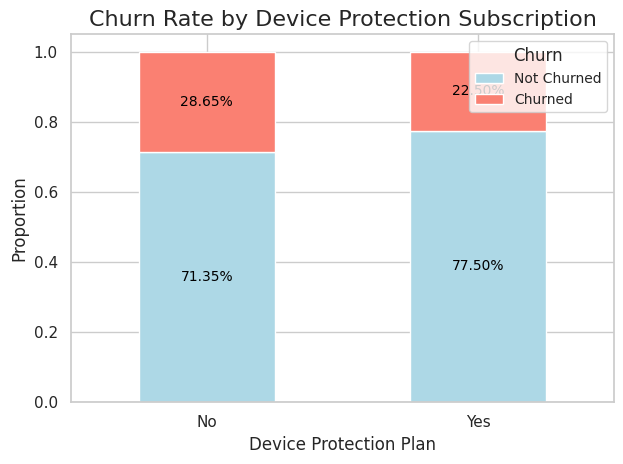

In [104]:
# Calculate churn rate by Device Protection Plan
churn_rate = df.groupby('Device Protection Plan')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn Rate by Device Protection Subscription', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Device Protection Plan', fontsize=12)  # Optional: Label for x-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)  # Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Churn Rate by Online Security Subscription

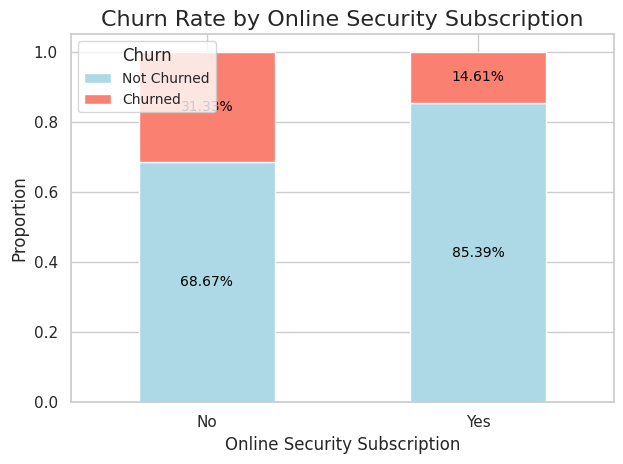

In [108]:
# Calculate churn rate by Online Security subscription
churn_rate = df.groupby('Online Security')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn Rate by Online Security Subscription', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Online Security Subscription', fontsize=12)  # Label for x-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for clarity
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)  # Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='Black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Churn Rate by Streaming TV Subscription

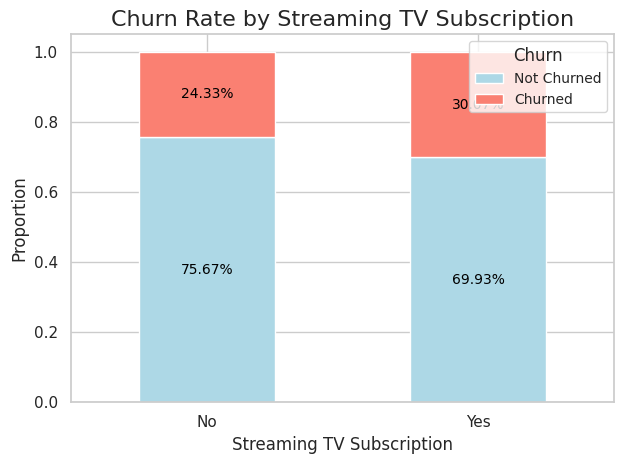

In [113]:
# Calculate churn rate by Streaming TV subscription
churn_rate = df.groupby('Streaming TV')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn Rate by Streaming TV Subscription', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Streaming TV Subscription', fontsize=12)  # Label for x-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for clarity
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)  # Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Distribution of Tenure

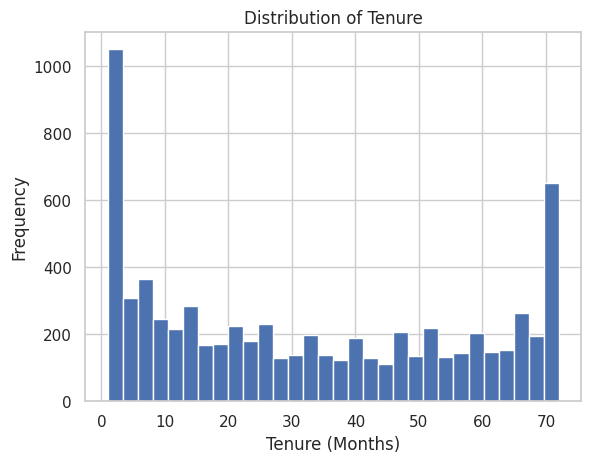

In [115]:
df['Tenure in Months'].plot.hist(bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.show()


Churn Rate Over Time

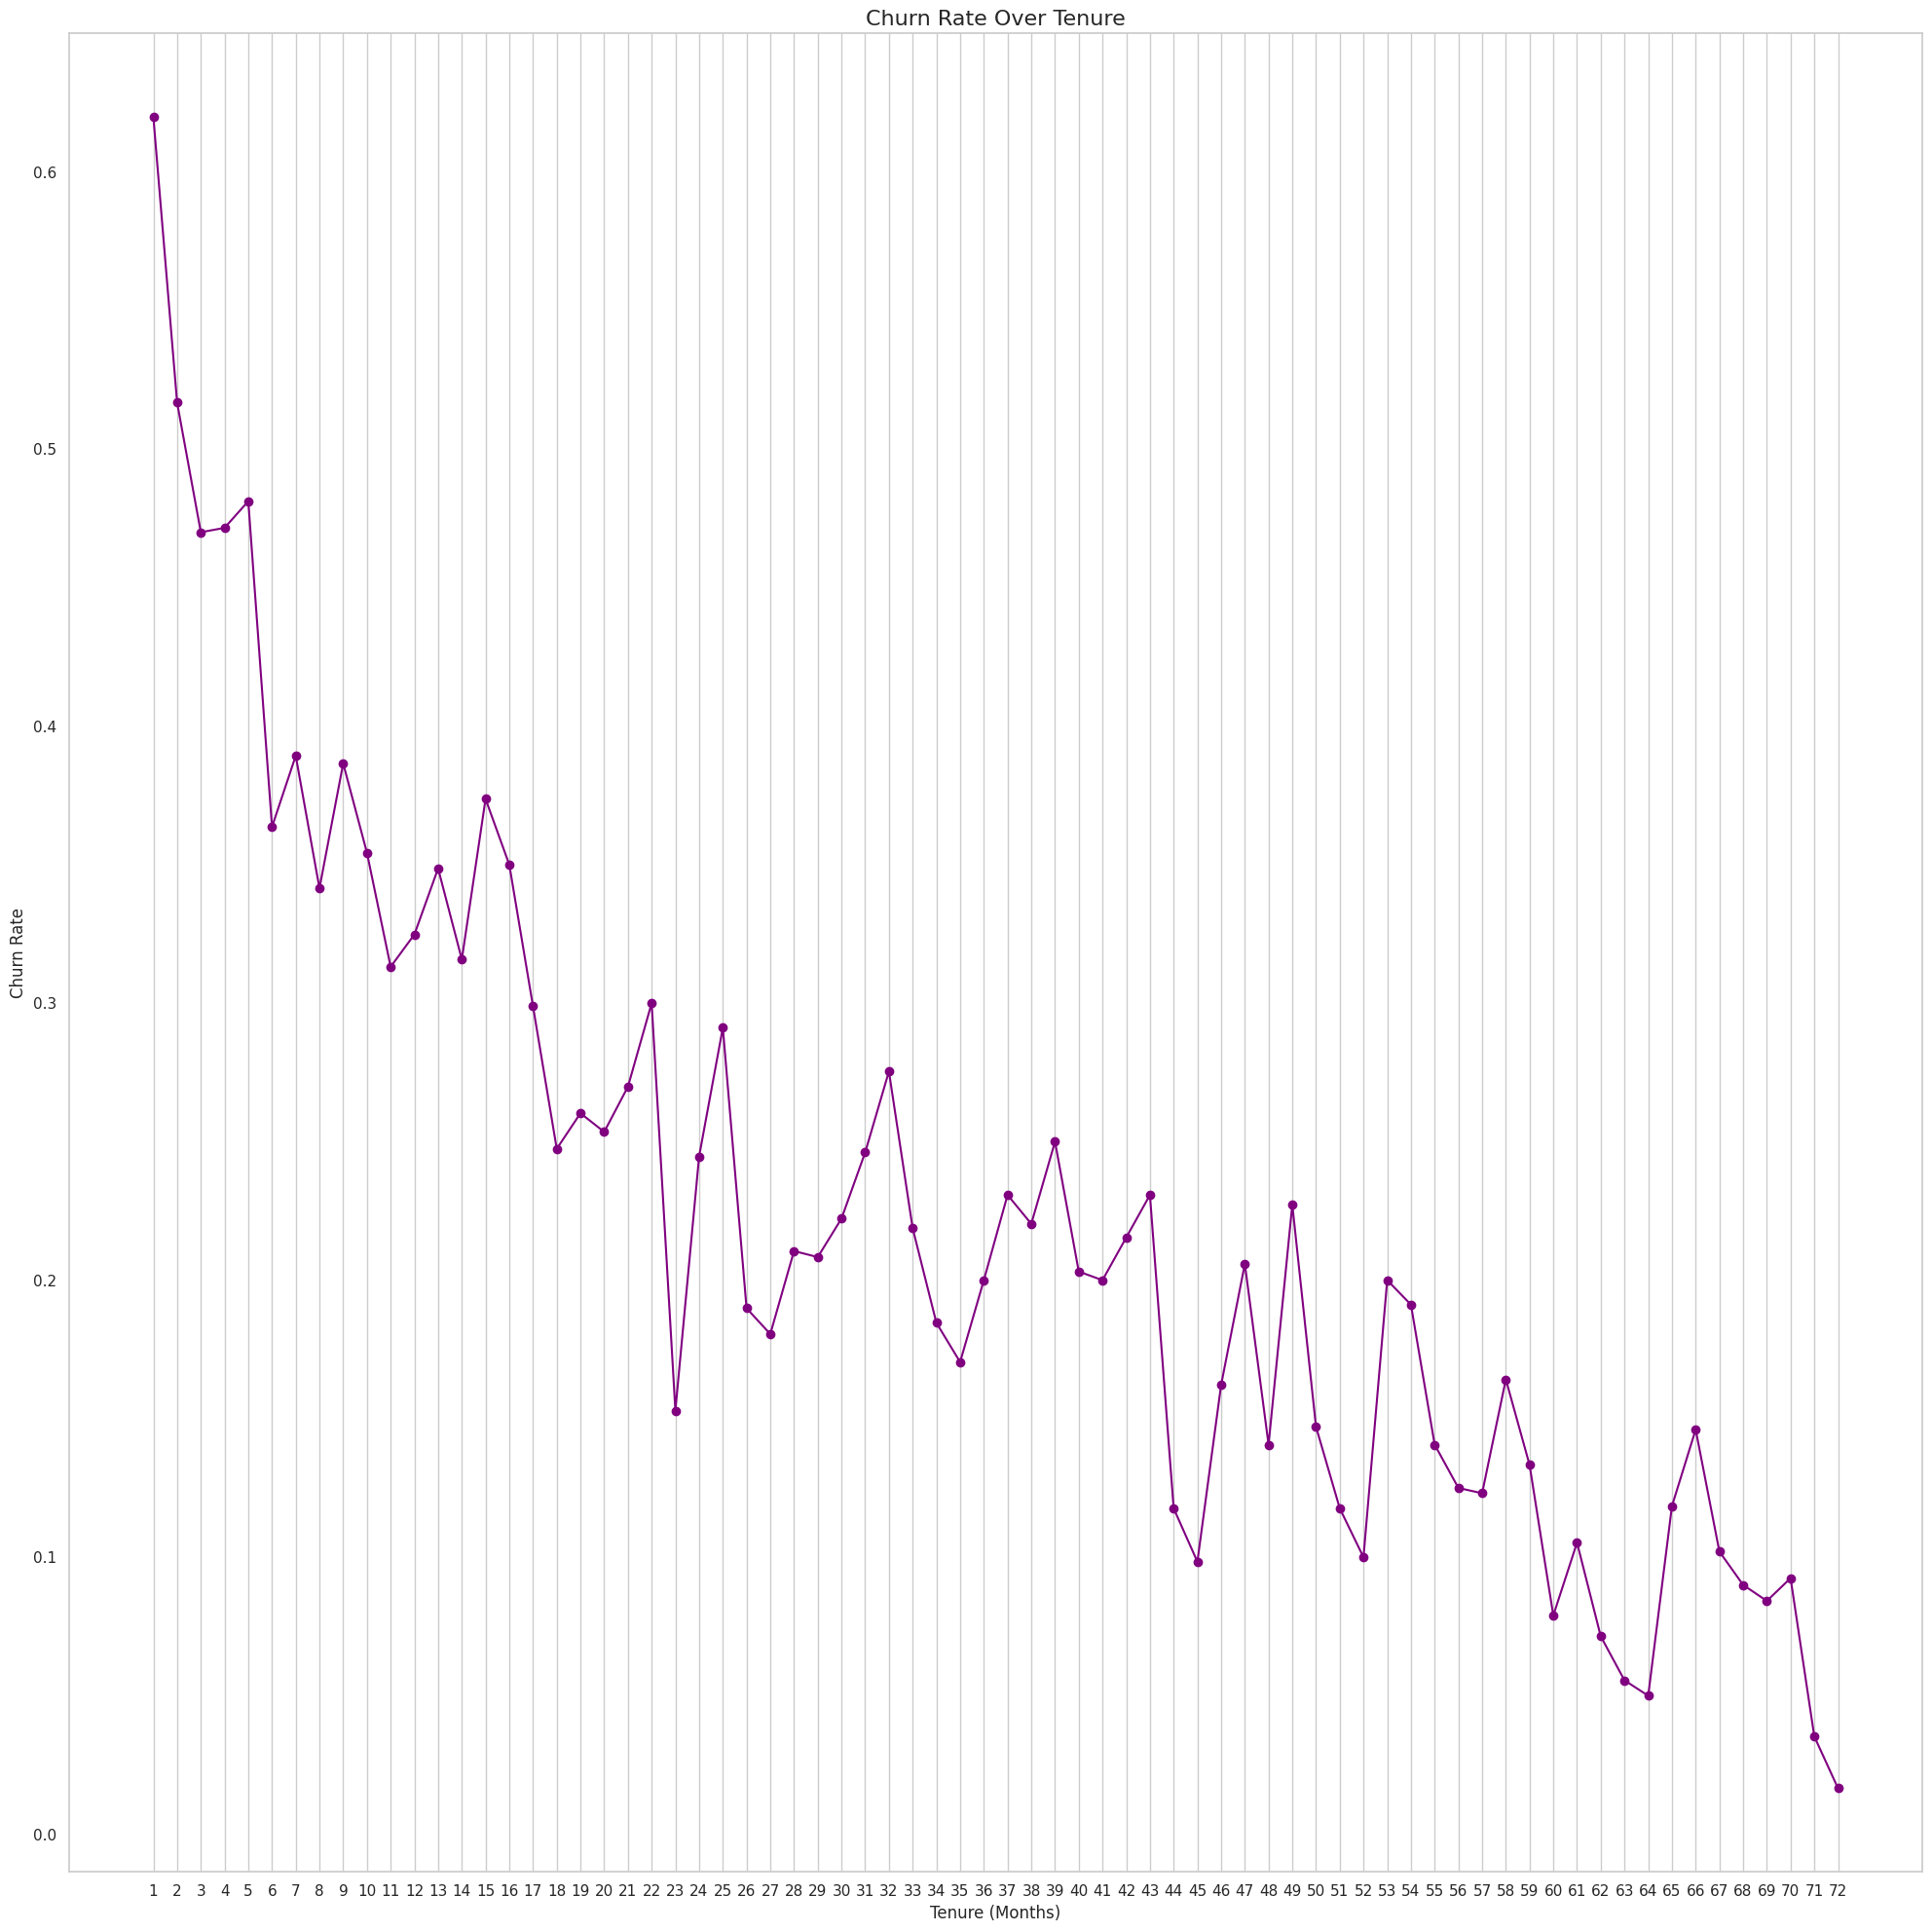

In [122]:
# Calculate churn rate over tenure
churn_over_time = df.groupby('Tenure in Months')['Churn'].mean()

# Plot the churn rate over tenure
plt.figure(figsize=(20, 20))
churn_over_time.plot(marker='o', linestyle='-', color='purple')  # Adding markers for clarity
plt.title('Churn Rate Over Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(churn_over_time.index)  # Ensure x-ticks match the tenure values
plt.grid(axis='y')  # Optional: Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Churn by Offer

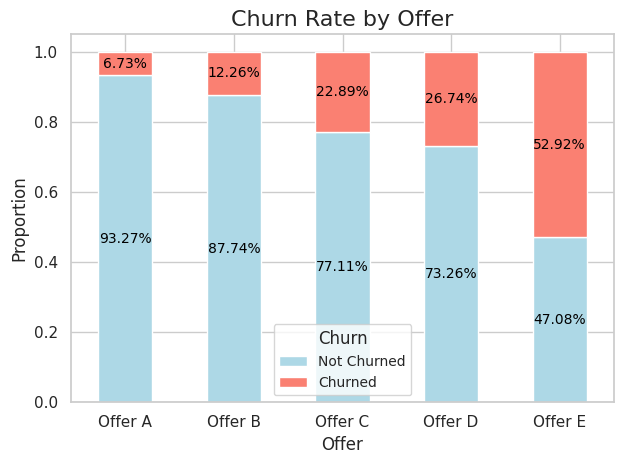

In [130]:
# Calculate churn rate by offer
churn_rate = df.groupby('Offer')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn Rate by Offer', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Offer', fontsize=12)  # Label for x-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for clarity
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)  # Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='Black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Churn Rate by Paperless Billing

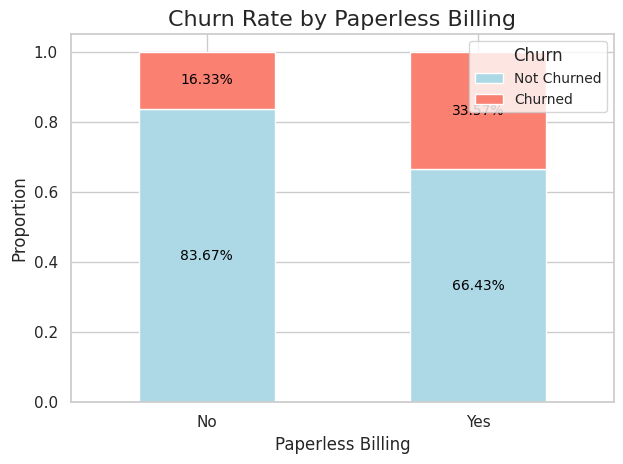

In [135]:
# Calculate churn rate by paperless billing status
churn_rate = df.groupby('Paperless Billing')['Churn Label'].value_counts(normalize=True).unstack()

# Plot the churn rate
ax = churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Churn Rate by Paperless Billing', fontsize=16)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Paperless Billing', fontsize=12)  # Label for x-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for clarity
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)  # Customize legend

# Optional: Adding values to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2  # Position in the middle of the segment
    ax.annotate(f'{height:.2%}', (x, y), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Monthly Charges vs. Total Charges

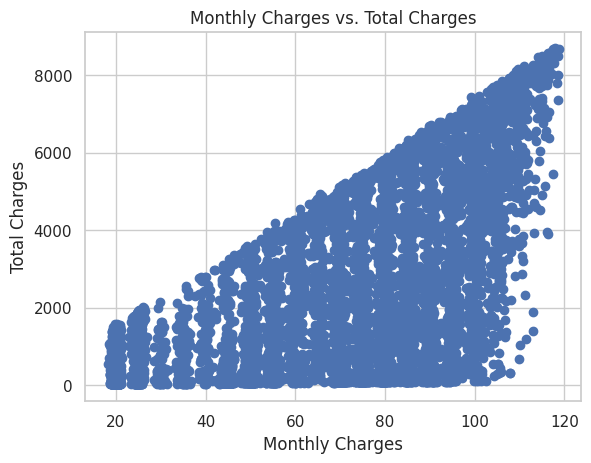

In [138]:
plt.scatter(df['Monthly Charge'], df['Total Charges'])
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()
